In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle as pk

pathGit = "c:/Git_proyects/Tesis/Embbedings_Lkvec/"
path = "c:/Facultad/Tesis/"
Lkvec = pd.read_csv(path+'Lkvec_all_in.csv')

In [3]:
Lkvec_unique = Lkvec.drop_duplicates(subset=['phrase'])


In [4]:
np.shape(Lkvec_unique)

(310457, 6)

In [6]:
#path = "c:/Git-Proyects/Tesis/"

mpnet = pk.load(open(pathGit+'clusters_threshold_75_22.pk', 'rb'))
mini = pk.load(open(pathGit+'clusters_threshold_75_02.pk', 'rb'))
phr = pk.load(open(path+'phrases_to_emb.pickle', 'rb'))
Lkvec_unique['id_cluster'] = np.nan

C:\Users\Asus\AppData\Local\Temp\ipykernel_4084\1591482705.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lkvec_unique['id_cluster'] = np.nan


In [9]:
indice_frases = {i: j for j, i in enumerate(Lkvec_unique['phrase'])}
for i, clus in enumerate(c_nuevo):
    Lkvec_unique.loc[Lkvec_unique['phrase'].isin([Lkvec_unique['phrase'][indice_frases[j]] for j in clus]), 'id_cluster'] = str(i+1)

#for i, clus in enumerate(c_nuevo):
#    for j in clus:
#        Lkvec_unique.loc[Lkvec_unique['phrase'] == phr[j], 'id_cluster'] = str(i+1)

KeyError: 35

In [7]:
cluster_mapping_mnet = {phr[j]: str(i+1) for i, clus in enumerate(mpnet) for j in clus}
cluster_mapping_mini = {phr[j]: str(i+1) for i, clus in enumerate(mini) for j in clus}


Lkvec_unique['id_cluster_mnet'] = Lkvec_unique['phrase'].map(cluster_mapping_mnet)
Lkvec_unique['id_cluster_mini'] = Lkvec_unique['phrase'].map(cluster_mapping_mini)

Lkvec_unique
np.shape(Lkvec_unique)

C:\Users\Asus\AppData\Local\Temp\ipykernel_4084\3740833514.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lkvec_unique['id_cluster_mnet'] = Lkvec_unique['phrase'].map(cluster_mapping_mnet)
C:\Users\Asus\AppData\Local\Temp\ipykernel_4084\3740833514.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Lkvec_unique['id_cluster_mini'] = Lkvec_unique['phrase'].map(cluster_mapping_mini)


(310457, 9)

In [21]:
import itertools

def calculate_rand_index(partitionA, partitionB):
    n = len(partitionA)
    a = 0  # Pares concordantes en la misma partición en ambas agrupaciones
    b = 0  # Pares concordantes en particiones diferentes en ambas agrupaciones

    for i in range(n-1):
        for j in range(i+1, n):
            if (partitionA[i] == partitionA[j]) and (partitionB[i] == partitionB[j]):
                a += 1
            elif (partitionA[i] != partitionA[j]) and (partitionB[i] != partitionB[j]):
                b += 1

    combinations = list(itertools.combinations(range(n), 2))
    num_combinations = len(combinations)

    rand_index = (a + b) / num_combinations
    return rand_index

In [ ]:
from sklearn.metrics import adjusted_rand_score

Lkvec_ids = np.array(Lkvec_unique['id'])
Clusters_ids = np.array(Lkvec_unique['id_cluster'])


rand_index = adjusted_rand_score(Lkvec_ids, Clusters_ids)

#calculate_rand_index(Lkvec_ids, Clusters_ids)

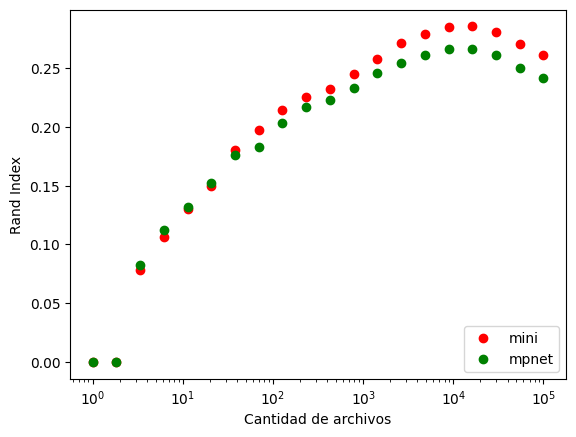

In [41]:
Lkvec_unique
header = np.logspace(np.log(1), int(np.log10(len(Lkvec_unique))), 20)
plt.figure()
for value in header:
    cluster_sizes = Lkvec_unique['id'].value_counts().sort_values(ascending=False)
    top_100_clusters = cluster_sizes.head(int(value))
    Lkvec_unique_100 = Lkvec_unique[Lkvec_unique['id'].isin(top_100_clusters.index)]
    Lkvec_ids = np.array(Lkvec_unique_100['id'])
    Clusters_ids_mini = np.array(Lkvec_unique_100['id_cluster_mini'])
    Clusters_ids_mnet = np.array(Lkvec_unique_100['id_cluster_mnet'])
    plt.plot(value, adjusted_rand_score(Lkvec_ids, Clusters_ids_mini), 'ro', label = 'Clustering mini')
    plt.plot(value, adjusted_rand_score(Lkvec_ids, Clusters_ids_mnet), 'go', label = 'Clustering mpnet')

plt.legend(['mini', 'mpnet'], loc = 'lower right')
plt.xscale('log')
plt.xlabel('Cantidad de archivos')
plt.ylabel('Rand Index')
plt.show()


In [35]:
header = np.logspace(np.log(1), int(np.log(len(Lkvec_unique))), 20)
header

array([1.00000000e+00, 4.28133240e+00, 1.83298071e+01, 7.84759970e+01,
       3.35981829e+02, 1.43844989e+03, 6.15848211e+03, 2.63665090e+04,
       1.12883789e+05, 4.83293024e+05, 2.06913808e+06, 8.85866790e+06,
       3.79269019e+07, 1.62377674e+08, 6.95192796e+08, 2.97635144e+09,
       1.27427499e+10, 5.45559478e+10, 2.33572147e+11, 1.00000000e+12])

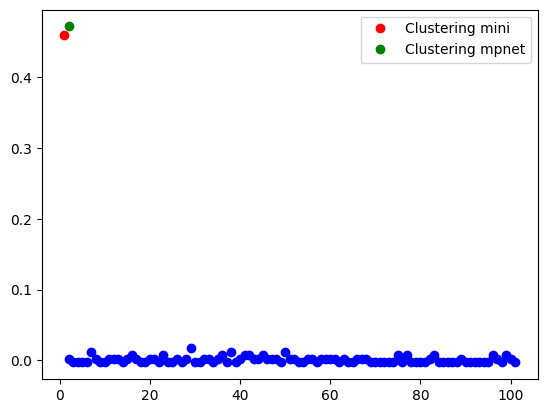

In [22]:
from sklearn.metrics import adjusted_rand_score

Lkvec_ids = np.array(Lkvec_unique_100['id'])
Clusters_ids_mini = np.array(Lkvec_unique_100['id_cluster_mini'])
Clusters_ids_mnet = np.array(Lkvec_unique_100['id_cluster_mnet'])
xs = np.arange(1,103)

plt.plot(xs[0], adjusted_rand_score(Lkvec_ids, Clusters_ids_mini), 'ro', label = 'Clustering mini')
plt.plot(xs[1], adjusted_rand_score(Lkvec_ids, Clusters_ids_mnet), 'go', label = 'Clustering mpnet')

rand_indexs = []
for i in range(100):
    np.random.shuffle(Lkvec_ids)
    ri = adjusted_rand_score(Lkvec_ids, Clusters_ids_mini)
    rand_indexs.append( ri)
    plt.plot(xs[i+1],ri, 'bo')
plt.legend()
plt.show()

In [29]:
Lkvec_ids = np.array(Lkvec_unique['id'])

adjusted_rand_score(Lkvec_ids, Clusters_ids_mnet)

0.2408770020835203

(array([100.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([-1.15585605e-05,  2.40772975e-02,  4.81661536e-02,  7.22550096e-02,
         9.63438657e-02,  1.20432722e-01,  1.44521578e-01,  1.68610434e-01,
         1.92699290e-01,  2.16788146e-01,  2.40877002e-01]),
 <BarContainer object of 10 artists>)

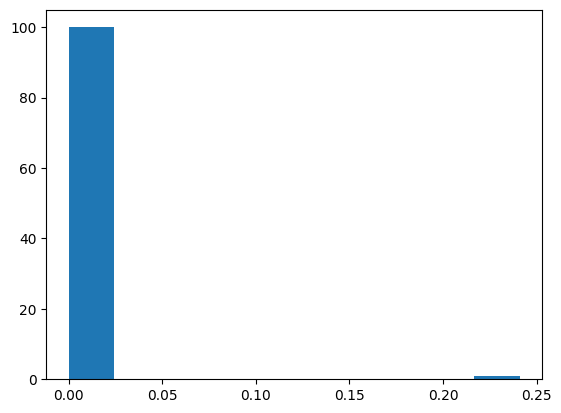

In [94]:
plt.hist(rand_indexs)